**Study Case Challenge**

Sebuah Perusahaan e-commerce yang sedang bertumbuh memiliki 9 department di seluruh organisasi perusahaan, memiliki 78.298 karyawan yang di bagikan menjadi 3 level, yaitu Senior, Middle dan Junior. Salah satu masalah yang dihadapi adalah perusahaan tidak memiliki persyaratan yang spesifik dan pola untuk mengidentifikasi talent yang sesuai untuk di promosikan di waktu yang tepat. Kondisi saat ini, promosi dilakukan berdasarkan permintaan dari senior manager.

Untuk saat ini,  Perusahaan sedang membutuhkan bantuan untuk mengidentifikasi faktor dalam menentukan promosi seorang karyawan juga mempertimbangkan dari sisi Promotion Cycle atau Siklus Promosi perusahaan tersebut. Beberapa data telah dikumpulkan oleh perusahaan baik itu data performansi lampau dan saat ini berdasarkan demografis. 

(data dapat di downloaded in https://drive.google.com/file/d/1povxTAqUoTDl_Q81uUvRrni9zU6gE1sh/view?usp=sharing)

Hal-hal yang perlu diperhatikan :
- Kualitas data dan cara untuk mengembangkannya.
- Apakah ada Insight berharga dan menarik yang dapat direkomendasikan kepada Manajemen? dan jelaskan.
- Memprediksi karyawan potensial yang berpotensi untuk dipromosikan atau tidak setelah melalui proses evaluasi (Skortambahan jika dapat diselesaikan )
- Hasil dapat dituangkan dalam sebuah deck presentasi maksimal 8 halaman (Termasuk cover)
- Lampirkan juga Script dalam bentuk file Python, R atau SQL (Skor tambahan jika dapat dilampirkan).
- Submit Presentasi dan Script kalian ke Gform berikut paling lambat hari senin 22 November 2021 15:22 WIB (Jakarta time).
- 3 Peserta terpilih akan diumumkan pada tanggal 25 November 2021 dan akan diberikan kesempatan untuk mempresentasikan Study Case nya pada saat sesi Review, untuk kemudian dipilih menjadi juara 1,2 dan 3
- Selain juara 1 sampai 3 akan dipilih juga satu pemenang favorit loh, semangat ya!

Link Submit Challange : https://docs.google.com/forms/d/e/1FAIpQLSd-fnl4bE9X3-0CGEsWZ3HU351inx2Xeoh0skINOIX3oK7XHg/viewform

In [ ]:
import os

data = 'data_train_dqlab.csv'
os.path.isfile(data)

True

In [ ]:
import pandas as pd

df = pd.read_csv(data)
df.head(10)

,employee_id,department,region,education,gender,job_level,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,satisfaction_score,engagement_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,senior,sourcing,1,35,5.0,8,0,49,5,0.88,0
1,65141,Operations,region_22,Bachelor's,m,middle,other,1,30,5.0,4,0,60,1,0.31,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,middle,sourcing,1,34,3.0,7,0,50,5,3.10,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,senior,other,2,39,1.0,10,0,50,4,0.64,0
4,48945,Technology,region_26,Bachelor's,m,senior,other,1,45,3.0,2,0,73,2,0.95,0
5,58896,Analytics,region_2,Bachelor's,m,middle,sourcing,2,31,3.0,7,0,85,5,0.32,0
6,20379,Operations,region_20,Bachelor's,f,middle,other,1,31,3.0,5,0,59,3,0.58,0
7,16290,Operations,region_34,Master's & above,m,middle,sourcing,1,33,3.0,6,0,63,5,1.31,0
8,73202,Analytics,region_20,Bachelor's,m,middle,other,1,28,4.0,5,0,83,4,2.70,0
9,28911,Sales & Marketing,region_1,Master's & above,m,middle,sourcing,1,32,5.0,5,0,54,1,0.32,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78298 entries, 0 to 78297
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           78298 non-null  int64  
 1   department            78298 non-null  object 
 2   region                78298 non-null  object 
 3   education             74855 non-null  object 
 4   gender                78298 non-null  object 
 5   job_level             78298 non-null  object 
 6   recruitment_channel   78298 non-null  object 
 7   no_of_trainings       78298 non-null  int64  
 8   age                   78298 non-null  int64  
 9   previous_year_rating  72362 non-null  float64
 10  length_of_service     78298 non-null  int64  
 11  awards_won?           78298 non-null  int64  
 12  avg_training_score    78298 non-null  int64  
 13  satisfaction_score    78298 non-null  int64  
 14  engagement_score      78298 non-null  float64
 15  is_promoted        

**Keterangan data :**
- employee_id: Unique ID untuk Karyawan
- department: Department tempat Karyawan
- region: Region of employment (Tidak Teratur)
- education: Tingkat Pendidikan
- gender: Jenis Kelamin dari Karyawan
- job_level: Job Level di posisi terkini
- recruitmentchannel: Sumber recruitment karyawan
- no of trainings: Jumlah pelatihan yang pernah diikuti
- Age: Usia Karyawan
- previous year rating: Rating karyawan tahun sebelumnya
- length of service: Lama kerja karyawan
- awards won?: Pernah mendapatkan penghargaan ( ya : 1, Tidak : 0 )
- avg_training_score: Nilai rata-rata pelatihan saat ini
- satisfaction_score: Nilai kepuasan karyawan terhadap perusahaan
- engagement_score: Nilai rata-rata karyawan merasa keterikatan dengan Perusahaan
- is_promoted: Recommended for promotion

In [ ]:
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               3443
gender                     0
job_level                  0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    5936
length_of_service          0
awards_won?                0
avg_training_score         0
satisfaction_score         0
engagement_score           0
is_promoted                0
dtype: int64

In [ ]:
# data kosong dihapus karena hanya sedikit
df.dropna(inplace=True)

In [ ]:
# kolom employee_id tidak dibutuhkan dalam modeling
# region, department, dan recruitment_channel tidak dapat dijadikan acuan promosi jabatan
df.drop(columns=['employee_id','region','department','recruitment_channel'], inplace=True)

# Job level senior sudah maksimal dan tidak dapat dipromosikan lagi
df.drop(df.index[df['job_level'] == 'senior'], inplace = True)

In [ ]:
df['gender'].replace(['f','m'],[0,1],inplace=True)

# Ordinal Encoding, memiliki urutan
df['education'].replace(['Below Secondary','Bachelor\'s','Master\'s & above'],[0,1,2],inplace=True)
df['job_level'].replace(['junior','middle'],[0,1],inplace=True)

In [ ]:
df['previous_year_rating'].unique()

array([5., 3., 4., 1., 2.])

In [ ]:
# previous_year_rating dibuat int karena hanya mengandung 1.0 2.0 3.0 4.0 5.0
df['previous_year_rating'] = df['previous_year_rating'].astype(int)

In [ ]:
df.describe()

,education,gender,job_level,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,satisfaction_score,engagement_score,is_promoted
count,37029.000000,37029.000000,37029.000000,37029.000000,37029.000000,37029.000000,37029.000000,37029.000000,37029.000000,37029.000000,37029.000000,37029.000000
mean,1.140890,0.692808,0.887359,1.294715,30.130600,3.326231,4.490291,0.024008,64.380216,2.996003,1.498137,0.016420
std,0.397137,0.461336,0.316158,0.650051,2.765122,1.262607,2.102071,0.153077,13.734594,1.418327,1.193812,0.127084
min,0.000000,0.000000,0.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,1.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,1.000000,28.000000,3.000000,3.000000,0.000000,52.000000,2.000000,0.540000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,30.000000,3.000000,4.000000,0.000000,61.000000,3.000000,1.170000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,32.000000,4.000000,6.000000,0.000000,78.000000,4.000000,2.240000,0.000000
max,2.000000,1.000000,1.000000,10.000000,34.000000,5.000000,13.000000,1.000000,99.000000,5.000000,5.000000,1.000000


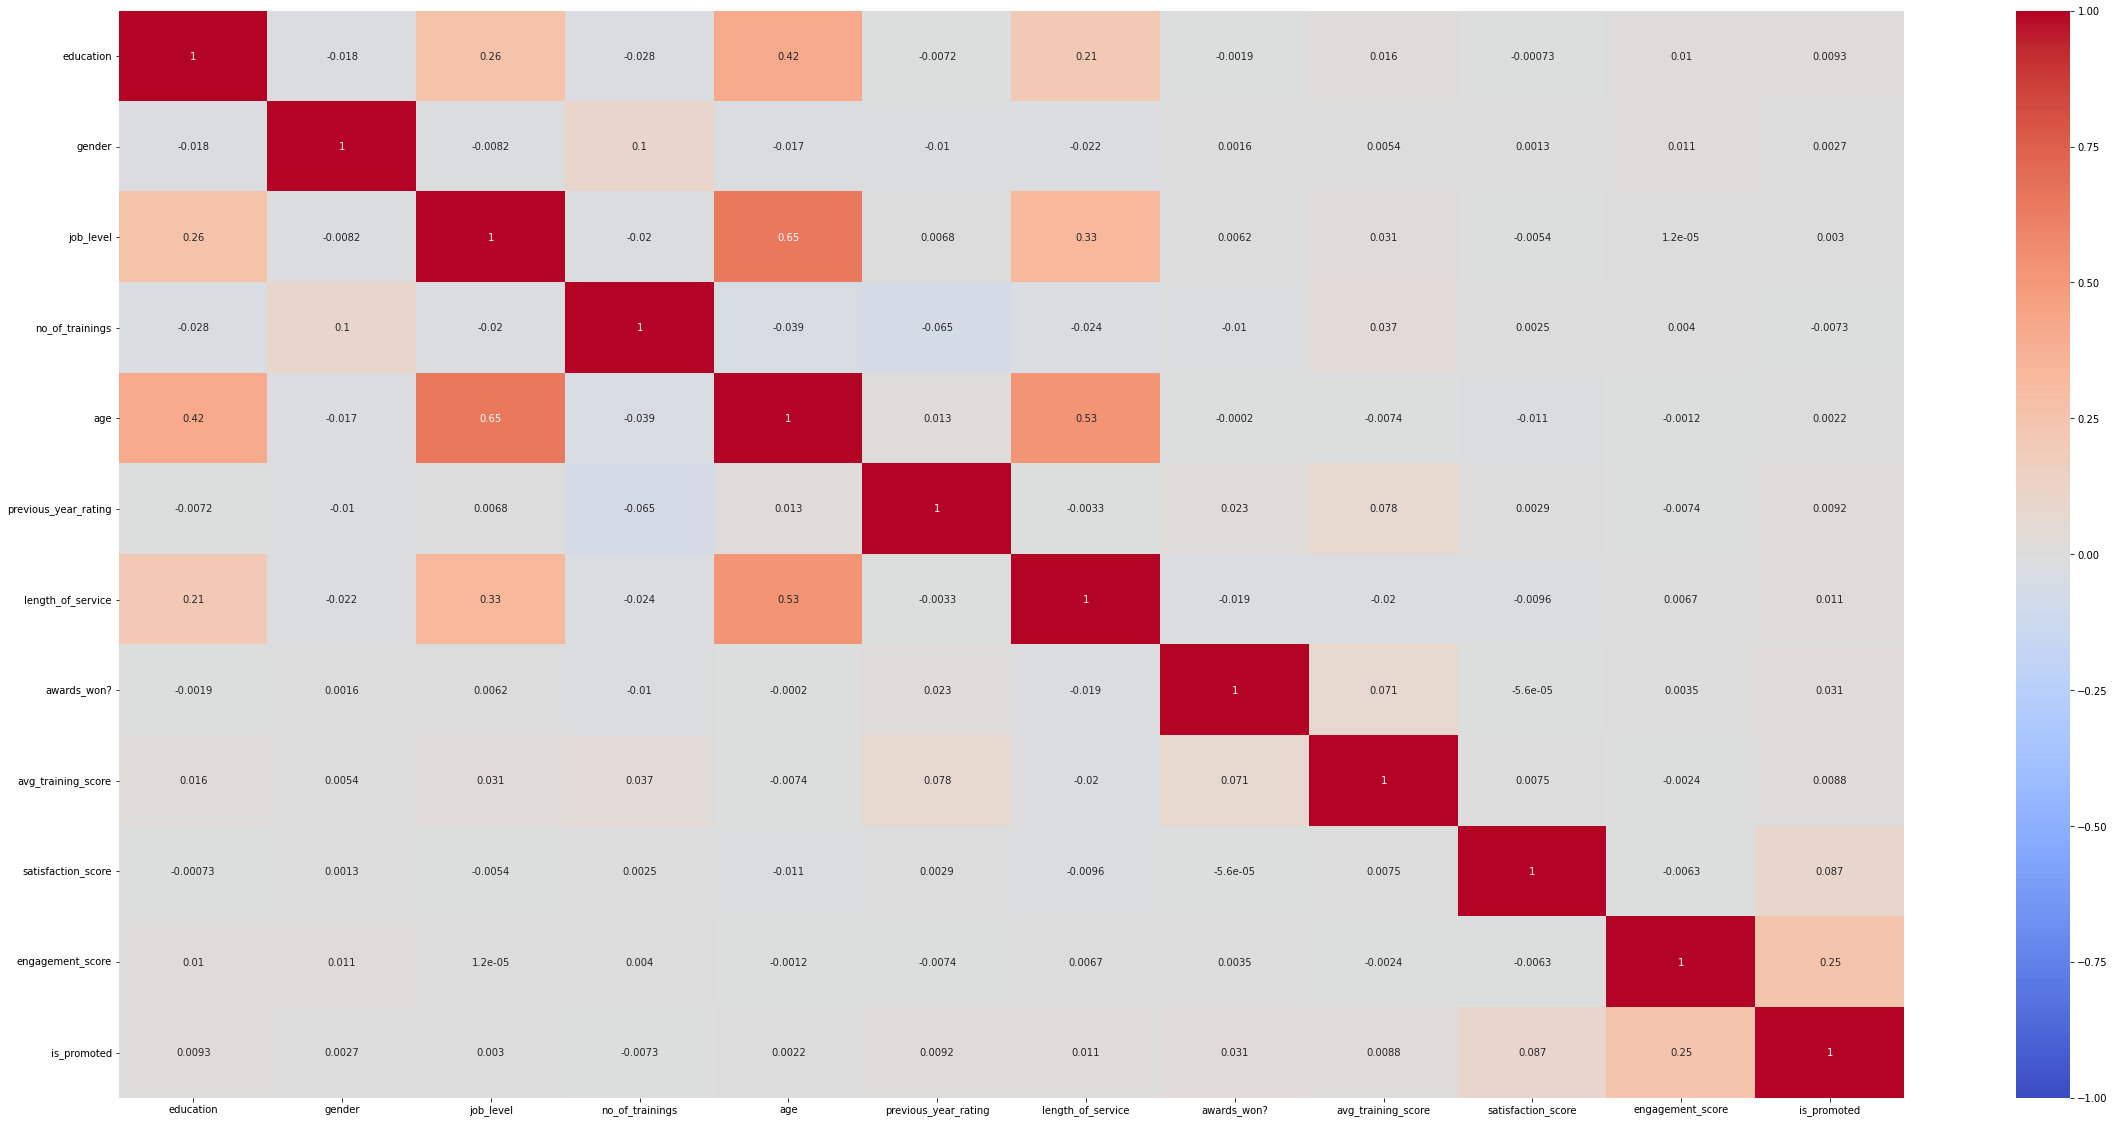

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=[40,20])
sns.heatmap(df.corr(), vmin=-1, cmap='coolwarm', annot=True)

In [ ]:
# korelasi gender dan age kepada target terlalu rendah(<0.003) maka tidak dibutuhkan
df.drop(['gender','age'], axis=1, inplace=True)

In [ ]:
# cek duplikasi ada disini karena beberapa fitur telah dihapus
df.duplicated().sum()

138

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df['is_promoted'].value_counts() # perbandingan kategori target

0    36283
1      608
Name: is_promoted, dtype: int64

In [ ]:
#df_encoded = pd.get_dummies(df, columns=['department','recruitment_channel'])

In [ ]:
feature = df.drop(['is_promoted'], axis=1)
target = df['is_promoted']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier

random_state = 42

X_train, X_test, y_train, y_test = train_test_split(feature, target, 
                                                    test_size=0.3, 
                                                    random_state=random_state)

tree_model = DecisionTreeClassifier(random_state=random_state).fit(X_train, y_train) 
gnb_model = GaussianNB().fit(X_train, y_train)
sgd_model = SGDClassifier(random_state=random_state).fit(X_train, y_train)
mlpc_model = MLPClassifier(random_state=random_state).fit(X_train, y_train)

# Return the mean accuracy on the given test data and labels
print('Tree Model Score:', tree_model.score(X_test, y_test))
print('Naive Bayes Model Score:', gnb_model.score(X_test, y_test))
print('SGD Model Score:', sgd_model.score(X_test, y_test))
print('MLPC Model Score:', mlpc_model.score(X_test, y_test))

Tree Model Score: 0.9722623780267438
Naive Bayes Model Score: 0.9760571015540296
SGD Model Score: 0.9793097217202746
MLPC Model Score: 0.9831947958077341


In [ ]:
df.keys()

Index(['education', 'job_level', 'no_of_trainings', 'previous_year_rating',
       'length_of_service', 'awards_won?', 'avg_training_score',
       'satisfaction_score', 'engagement_score', 'is_promoted'],
      dtype='object')

In [ ]:
# Prediksi menggunakan nilai acak
import random

education = random.randint(0, 2)
job_level = random.randint(0, 1)
no_of_trainings = random.randint(1, 10)
previous_year_rating = random.randint(1, 5)
length_of_service = random.randint(0, 20)
awards_won = random.randint(0, 1)
avg_training_score = random.randint(20, 100)
satisfaction_score = random.randint(1, 5)
engagement_score =  round(random.uniform(0, 5), 1)

data_test = [[education,job_level,no_of_trainings,previous_year_rating,
              length_of_service,awards_won, avg_training_score,
              satisfaction_score, engagement_score]]

test_tree = tree_model.predict(data_test)
test_gnb = gnb_model.predict(data_test)
test_sgd = sgd_model.predict(data_test)
test_mlpc = mlpc_model.predict(data_test)
print(data_test)
print('')
print('(0:Not Promoted, 1:Promoted), The value is')
print('Decision Tree:', test_tree)
print('Naive Bayes:',test_gnb)
print('SGD:',test_sgd)
print('MLPC',test_mlpc)

[[2, 1, 2, 1, 15, 1, 88, 1, 0.4]]

(0:Not Promoted, 1:Promoted), The value is
Decision Tree: [0]
Naive Bayes: [0]
SGD: [0]
MLPC [0]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
# Prediksi menggunakan nilai masukan

education = int(input('Education (0:Below Secondary, 1:Bachelor\'s, 2:Master\'s & above): '))
job_level = int(input('Job Level (0:Junior, 1:Middle): '))
no_of_trainings = int(input('No of Training (1-10): '))
previous_year_rating = int(input('Previous Year Rating (1-5): '))
length_of_service = int(input('Length of Service: '))
awards_won = int(input('Awards Won (0:No, 1:Yes): '))
avg_training_score = int(input('Average Training Score (0-100): '))
satisfaction_score = int(input('Satisfaction Score (1-5): '))
engagement_score =  float(input('Engagement_score (Float 0.0-5.0): '))

data_test = [[education,job_level,no_of_trainings,previous_year_rating,
              length_of_service,awards_won, avg_training_score,
              satisfaction_score, engagement_score]]
              
test_tree = tree_model.predict(data_test)
test_gnb = gnb_model.predict(data_test)
test_sgd = sgd_model.predict(data_test)
test_mlpc = mlpc_model.predict(data_test)
print(data_test)
print('')
print('(0:Not Promoted, 1:Promoted), The value is')
print('Decision Tree:', test_tree)
print('Naive Bayes:',test_gnb)
print('SGD:',test_sgd)
print('MLPC',test_mlpc)
